# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Carregar o conjunto de dados

## Training set

In [2]:
train_set = pd.read_csv('dataset/train_set.csv', index_col=0)

In [3]:
train_set.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
496,400.0,8,548.27,14.60,-390.30,0.150000,2553,0.007359,1.431701,346920,2484.59,0.220668,76.59,0.001958,109.654,5,1
29,0.0,0,0.00,-6.50,-16.80,0.150000,112,0.017231,0.000000,6500,6692.13,0.000000,0.00,0.000000,0.000,0,0
152,50.0,1,0.00,49.40,-0.60,0.150000,4,0.021622,0.000000,185,170.91,0.000000,0.00,0.000000,0.000,0,1
22,0.0,0,0.00,451.35,-1.20,0.300000,4,0.006814,0.000000,587,8984.43,0.000000,0.00,0.000000,0.000,0,1
101,50.0,1,0.00,38.15,-10.85,0.152817,71,0.003333,0.000000,21304,2030.91,0.000000,0.00,0.000000,0.000,0,1


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 496 to 208
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   372 non-null    float64
 1   feature1   372 non-null    int64  
 2   feature2   372 non-null    float64
 3   feature3   372 non-null    float64
 4   feature4   372 non-null    float64
 5   feature5   372 non-null    float64
 6   feature6   372 non-null    int64  
 7   feature7   372 non-null    float64
 8   feature8   372 non-null    float64
 9   feature9   372 non-null    int64  
 10  feature10  372 non-null    float64
 11  feature11  372 non-null    float64
 12  feature12  372 non-null    float64
 13  feature13  372 non-null    float64
 14  feature14  372 non-null    float64
 15  feature15  372 non-null    int64  
 16  target     372 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 52.3 KB


In [5]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (372, 16)
y_train shape: (372,)


## Test set

In [6]:
test_set = pd.read_csv('dataset/test_set.csv', index_col=0)

In [7]:
test_set.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
393,550.0,3,1230.09,68.34,-481.66,0.744451,647,0.003141,2.553855,205965,21556.49,0.057064,24.083000,0.030912,61.504500,20,1
235,50.0,1,249.55,5.00,-45.00,0.150000,300,0.112444,5.545556,2668,639.75,0.390074,15.000000,0.010000,83.183333,3,0
263,1000.0,1,22028.16,173.30,-1809.85,0.328871,5386,0.005651,12.436154,953156,41443.09,0.531528,15.011017,0.021909,186.679322,118,0
483,350.0,7,286.75,21.49,-343.03,0.271544,1198,0.003540,0.881467,338395,743.43,0.385712,81.327500,0.003339,71.687500,4,1
305,200.0,2,183.99,82.61,-116.87,0.212878,549,0.008885,1.574313,61790,1021.89,0.180049,116.870000,0.001821,183.990000,1,1


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 393 to 206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   94 non-null     float64
 1   feature1   94 non-null     int64  
 2   feature2   94 non-null     float64
 3   feature3   94 non-null     float64
 4   feature4   94 non-null     float64
 5   feature5   94 non-null     float64
 6   feature6   94 non-null     int64  
 7   feature7   94 non-null     float64
 8   feature8   94 non-null     float64
 9   feature9   94 non-null     int64  
 10  feature10  94 non-null     float64
 11  feature11  94 non-null     float64
 12  feature12  94 non-null     float64
 13  feature13  94 non-null     float64
 14  feature14  94 non-null     float64
 15  feature15  94 non-null     int64  
 16  target     94 non-null     int64  
dtypes: float64(12), int64(5)
memory usage: 13.2 KB


In [9]:
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]
print('X_train shape:', X_test.shape)
print('y_train shape:', y_test.shape)

X_train shape: (94, 16)
y_train shape: (94,)


# Preparação dos Dados para Regressão Logística

Particularidades na preparação dos dados para Regressão Logística

* **Vairável de Saída Binária**: A regressão logística é pensada para a classificação binária

* **Remover o Ruído**: A regressão lógistica assume erro zero na variável de saída (*target*), considere remover *outliers* e poissíveis amostras classificadas errôneamente do conjunto de treinamento.

* **Distribuição Gaussiana**: A regressão lógistica é um algoritmo linear (com uma transformação não linear na saída). Ele assume uma relação linear entre as variáveis de entrada com a variável de saída. Transformar as variáveis de entrada de modo a expor melhor essa relação pode lever a um modelo mais acurado. Por exemplo, use log, raiz, Box-Cox e outras transformações univariadas para explor melhor essa relação.

* **Remover Entradas Correlacionadas**: Assimo como na Regressão Linear, o modelo pode *overfit* se existirem muitas variáveis de entradas altamente correlacionadas. Considere calcular a correlação entre as variáveis de entrada e remover entradas altamente correlacionadas.

* **Falhar ao Convergir**: É possível no processo de aprendizagem a falha ao convergir nos valores do coeficientes. Isto pode acontecer se existirem muitas entradas correlacionadas ou se os dados são muito esparsos (por exemplo, muitos zeros nas variáveis de entrada).

## Remoção do Ruído

*Outliers* podem ter muitas causas como:
* Erro de entrada ou medição;
* Dados corrompidos;
* Verdadeira observação de *outlier*.

Em geral, não existe uma maneira precisa para definir e identificar *outliers*, porque isso vai depender das especificidades do conjunto de dados. Em um cenário ideal os dados brutos devem ser observados e interpretados com a ajuda de um especialista no assunto para definir se o valor é ou não um *outlier*. A Regressão Logísticas tende a performar melhor sem *outliers*, dito isso, em um primeiro momento treinarar-se-á o modelo sem os *outliers*, todavia posteriormente pode se testar treinar o modelo com os *outliers*, afinal a experimentação em Ciência de Dados é fundamental.

Para fins de registro a célula a seguir usa o algoritmo de classificação de classe única *Local Outlier Factor* para identificar possivéis *outliers* no conjunto de treinamento (Foram usados os valores padrão para os hiperparâmetros, para um melhor resultado esses valores devem ajustados).

In [10]:
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor()
outliers = lof.fit_predict(X_train)

In [11]:
total_X_train = len(X_train)
total_outliers = sum(outliers==-1)
total_outliers_1 = sum(y_train[outliers==-1])
total_outliers_0 = total_outliers - total_outliers_1
print("Quantidade de outliers: {} | %{:.2f}".format(total_outliers,total_outliers/total_X_train*100))
print("Quantidade de outliers na classe 1: {} | %{:.2f}".format(total_outliers_1,total_outliers_1/total_outliers*100))
print("Quantidade de outliers na classe 0: {} | %{:.2f}".format(total_outliers_0,total_outliers_0/total_outliers*100))

Quantidade de outliers: 41 | %11.02
Quantidade de outliers na classe 1: 17 | %41.46
Quantidade de outliers na classe 0: 24 | %58.54


In [12]:
# select all rows that are not outliers
mask = outliers != -1
X_train_prepared, y_train_prepared = X_train.iloc[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train_prepared.shape, y_train_prepared.shape)

(331, 16) (331,)


## Deixando a Distribuição das Variáveis de Entrada mais Gaussiana

### Distribuição original das características 

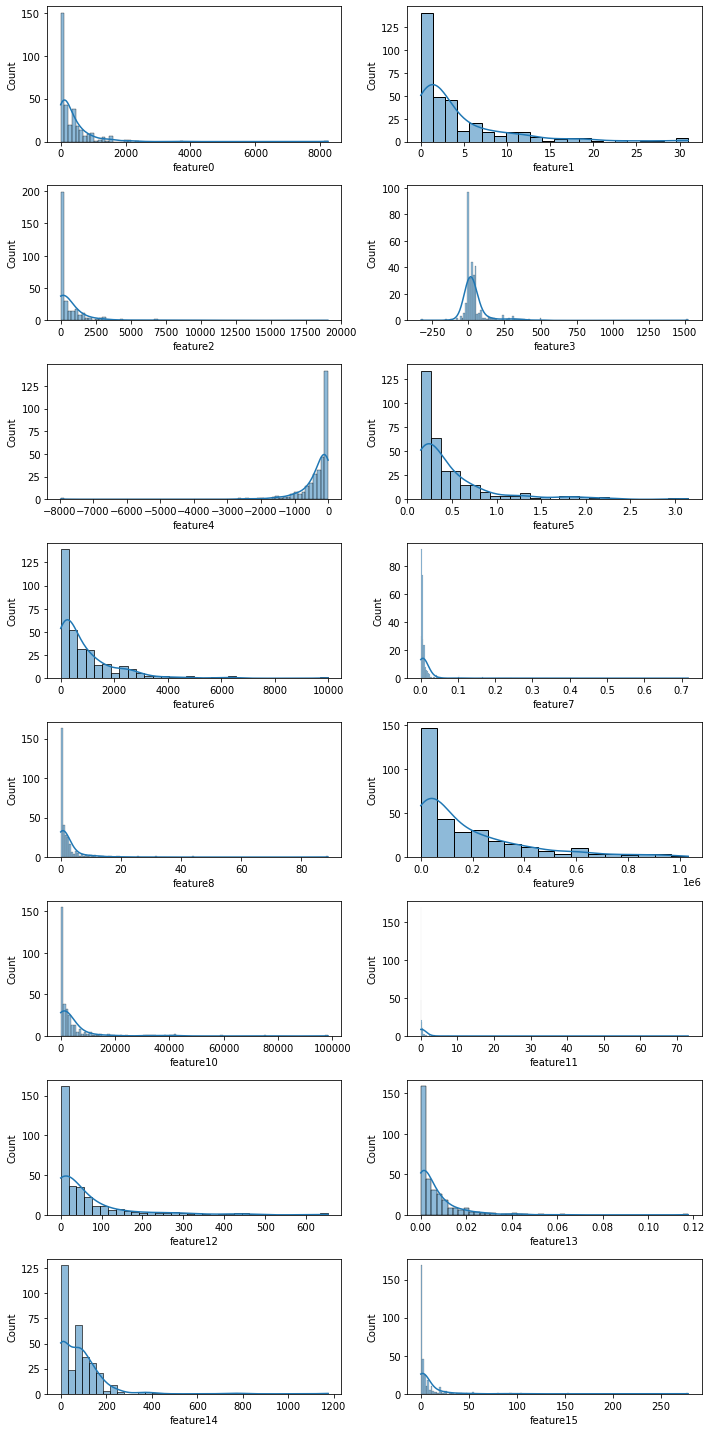

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 20))
gs = f.add_gridspec(8, 2)

i=0
for column in X_train_prepared: 
    ax = f.add_subplot(gs[i])
    sns.histplot(x=X_train_prepared[column],kde=True)
    i += 1
    
f.tight_layout()

### Distribuição mais gaussiana das características

In [14]:
# feature4
X_train_prepared.loc[:,'feature4'] =  np.log1p(-1*X_train_prepared.loc[:,'feature4']).values

# All features except 3 and 4
columns = ['feature0', 'feature1', 'feature2', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15']
i=0
for column in X_train_prepared[columns]: 
    X_train_prepared.loc[:,column] = np.log1p(X_train_prepared.loc[:,column]).values
    i += 1

/tmp/ipykernel_18138/3930641456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepared.loc[:,'feature4'] =  np.log1p(-1*X_train_prepared.loc[:,'feature4']).values
/tmp/ipykernel_18138/3930641456.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepared.loc[:,column] = np.log1p(X_train_prepared.loc[:,column]).values


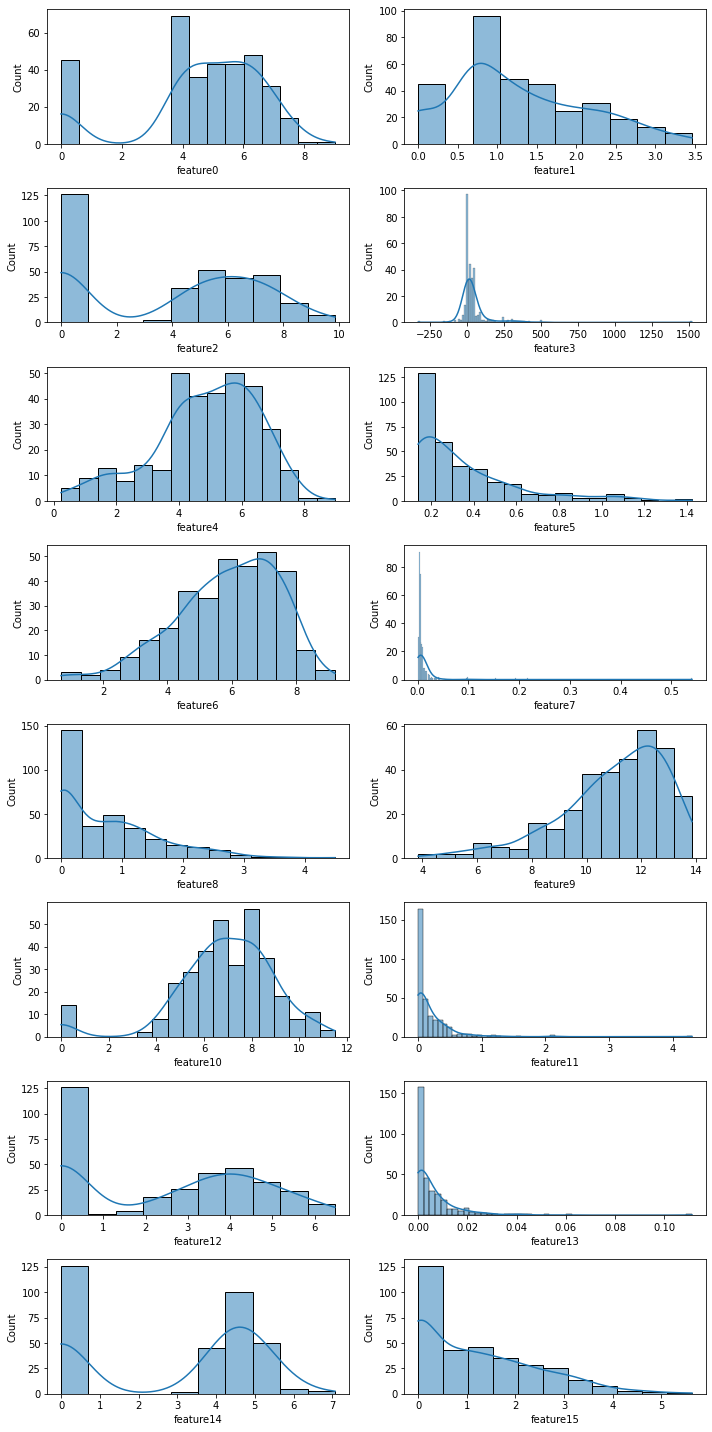

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 20))
gs = f.add_gridspec(8, 2)

i=0
for column in X_train_prepared: 
    ax = f.add_subplot(gs[i])
    sns.histplot(x=X_train_prepared[column],kde=True)
    i += 1
    
f.tight_layout()

Notavelmente a transformação deixou mais gaussiana as distribuições de algumas *features*, porém em outras não surtiu muito efeito. Posteriormente pode-se testar outras transformações para melhorar o resultado geral.

## Removendo Entradas Altamente Correlacionadas

Correlação de Pearson:
* 0.9 para mais ou para menos indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [16]:
corr_matrix = X_train_prepared.corr()

In [17]:
corr_matrix

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
feature0,1.000000,0.827836,0.489881,0.122778,0.735150,0.269314,0.640687,-0.221447,0.117577,0.654184,0.445453,0.194532,0.456751,0.027089,0.407005,0.516563
feature1,0.827836,1.000000,0.579874,-0.041242,0.771529,0.234149,0.688774,-0.180184,0.181008,0.682206,0.486602,0.224204,0.508771,0.097486,0.472289,0.628573
feature2,0.489881,0.579874,1.000000,0.109998,0.658402,-0.032763,0.695687,-0.088003,0.765898,0.577813,0.513943,0.470320,0.815629,0.520465,0.950559,0.901664
feature3,0.122778,-0.041242,0.109998,1.000000,0.021952,-0.044695,0.033631,-0.011928,0.103715,0.002490,0.113945,-0.005427,-0.004032,0.083930,0.046066,0.180479
feature4,0.735150,0.771529,0.658402,0.021952,1.000000,0.331440,0.900635,-0.156926,0.230287,0.889614,0.460365,0.295517,0.629046,0.106999,0.581516,0.652488
feature5,0.269314,0.234149,-0.032763,-0.044695,0.331440,1.000000,-0.092348,-0.145438,-0.207627,0.123612,0.040975,-0.087737,0.089781,-0.034345,-0.022118,-0.047318
feature6,0.640687,0.688774,0.695687,0.033631,0.900635,-0.092348,1.000000,-0.090828,0.337115,0.887393,0.439526,0.351357,0.608641,0.118755,0.611981,0.695716
feature7,-0.221447,-0.180184,-0.088003,-0.011928,-0.156926,-0.145438,-0.090828,1.000000,0.017809,-0.373865,-0.068539,-0.045947,-0.114693,0.055469,-0.082893,-0.078817
feature8,0.117577,0.181008,0.765898,0.103715,0.230287,-0.207627,0.337115,0.017809,1.000000,0.195999,0.337232,0.397283,0.384664,0.797936,0.715891,0.704476
feature9,0.654184,0.682206,0.577813,0.002490,0.889614,0.123612,0.887393,-0.373865,0.195999,1.000000,0.383282,0.283430,0.568777,0.017906,0.520644,0.558404


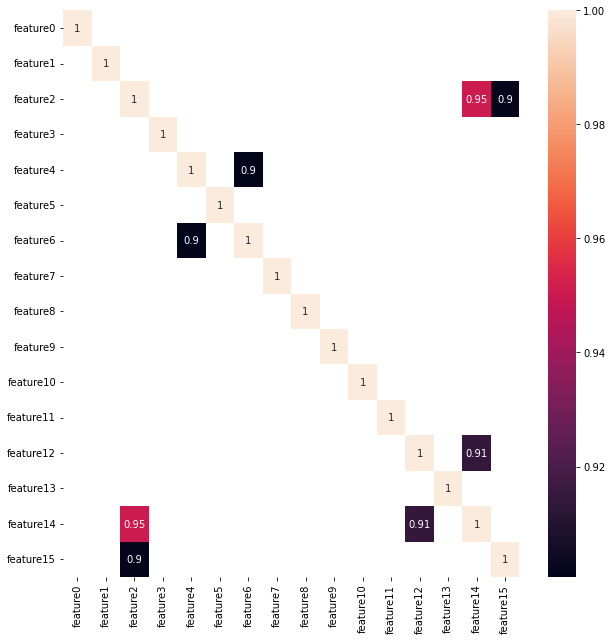

In [18]:
mask = abs(corr_matrix) <= 0.9

f = plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, mask=mask);
f.tight_layout()

In [19]:
(mask != True).sum() - 1 

feature0     0
feature1     0
feature2     2
feature3     0
feature4     1
feature5     0
feature6     1
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    1
feature13    0
feature14    2
feature15    1
dtype: int64

De acordo com a matriz de correlação removerei as  *features* 2, 4 e 14. Posteriormente mais testes estatísticos podem ser feitos para escolher qual das *features* remover quando elas são altamente correlacionadas.

In [20]:
X_train_prepared = X_train_prepared.drop(columns=['feature2','feature4','feature14'])
X_train_prepared

,feature0,feature1,feature3,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature15
496,5.993961,2.197225,14.60,0.139762,7.845416,0.007332,0.888591,12.756852,7.818265,0.199398,4.351439,0.001957,1.791759
152,3.931826,0.693147,49.40,0.139762,1.609438,0.021391,0.000000,5.225747,5.146971,0.000000,0.000000,0.000000,0.000000
101,3.931826,0.693147,38.15,0.142208,4.276666,0.003327,0.000000,9.966697,7.616732,0.000000,0.000000,0.000000,0.000000
14,0.000000,0.000000,149.98,0.231112,0.693147,0.004535,0.000000,5.398163,8.242562,0.000000,0.000000,0.000000,0.000000
93,3.931826,0.693147,43.90,0.262364,3.663562,0.097764,0.000000,5.916202,5.827150,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,5.303305,1.609438,43.28,1.022072,4.897840,0.003678,1.055089,10.493965,8.623384,0.076667,4.781641,0.014926,1.098612
521,6.216606,2.397895,-9.88,0.490357,6.646391,0.002957,0.895681,12.467059,6.945407,0.518690,4.588431,0.006481,1.791759
457,5.707110,1.945910,-30.03,0.299508,6.769642,0.002412,0.192202,12.794581,3.909821,0.840201,5.719656,0.001149,0.693147
266,5.017280,1.098612,149.55,0.139762,1.386294,0.037271,0.000000,4.382027,4.381151,0.000000,0.000000,0.000000,0.000000


## Feature Scaling

In [21]:
import pickle
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_train_prepared = pd.DataFrame(feature_scaler.fit_transform(X_train_prepared), index=X_train_prepared.index, columns=X_train_prepared.columns)

pickle.dump(feature_scaler, open('deploy/parameters/feature_scaler.pkl', 'wb'))

## *Data Preparation Function*

In [22]:
import pickle
import pandas as pd

class DataPrep(object):
    def __init__(self):
        self.feature_scaler = pickle.load(open('deploy/parameters/feature_scaler.pkl','rb'))
    
    def data_preparation(self, df):
        # Turning features more Guassian
        # feature4
        df.loc[:,'feature4'] =  np.log1p(-1*df.loc[:,'feature4']).values

        # All features except 3 and 4
        columns = ['feature0', 'feature1', 'feature2', 'feature5',
               'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
               'feature11', 'feature12', 'feature13', 'feature14', 'feature15']
        i=0
        for column in df[columns]: 
            df.loc[:,column] = np.log1p(df.loc[:,column]).values
            i += 1
        
        # Drop highly correlated features
        df = df.drop(columns=['feature2','feature4','feature14'])
        
        # feature scaling
        df = pd.DataFrame(self.feature_scaler.transform(df), index=df.index, columns=df.columns)
        return df  

# Treinamento do modelo

In [23]:
def display_scores(scores, algoritmo):
    print('Algoritmo ' + algoritmo)
    print("Scores:", scores)
    print("Mean: {:.4f}".format(scores.mean()))
    print("Standard deviation: {:.4f}".format(scores.std()))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_lr = LogisticRegression(random_state=42).fit(X_train_prepared, y_train_prepared)
scores = cross_val_score(model_lr, X_train_prepared, y_train_prepared, cv=5, scoring='accuracy')

In [25]:
display_scores(scores, 'Regressão Logística')

Algoritmo Regressão Logística
Scores: [0.67164179 0.62121212 0.71212121 0.66666667 0.56060606]
Mean: 0.6464
Standard deviation: 0.0517


## Aperfeiçoando o modelo (*Grid Search*)

In [26]:
from sklearn.model_selection import GridSearchCV
import scipy as sc

param_grid = {
    "C": [0.09765625, 0.1953125, 0.390625, 0.78125, 1.5625, 3.125, 6.25, 12.5, 25.0, 50.0, 100.0]
}
model_lr = GridSearchCV(
    LogisticRegression(random_state=42), param_grid)
model_lr = model_lr.fit(X_train_prepared, y_train_prepared)
print("Melhor estimador encontrado pela GridSearch:")
print(model_lr.best_estimator_)

Melhor estimador encontrado pela GridSearch:
LogisticRegression(C=0.390625, random_state=42)


In [27]:
pd.DataFrame(model_lr.cv_results_).iloc[model_lr.best_index_,:]

mean_fit_time               0.005343
std_fit_time                0.000343
mean_score_time              0.00122
std_score_time              0.000056
param_C                     0.390625
params               {'C': 0.390625}
split0_test_score           0.671642
split1_test_score           0.636364
split2_test_score           0.727273
split3_test_score           0.666667
split4_test_score           0.575758
mean_test_score              0.65554
std_test_score              0.049521
rank_test_score                    1
Name: 2, dtype: object

## Salvando o modelo 

In [28]:
import pickle

pickle.dump(model_lr, open('deploy/model/model.pkl', 'wb'))

# Avaliação da performance do modelo

In [29]:
# instantiate data preparation
pipeline = DataPrep()

# data data preparation
X_test_prepared = pipeline.data_preparation(X_test)

In [30]:
from sklearn.metrics import accuracy_score

y_pred = model_lr.predict(X_test_prepared)

print('Acurácia do modelo: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Acurácia do modelo: 67.02%


# Colocando o modelo em produção

O modelo foi colocado em produção através de uma API contruída com o *framework* Flask disponibilizada na plataforma Heroku.O *endpoint* para obter as previsões do modelo é: https://machine-learning-classifier.herokuapp.com/predict

Para acessar os códigos da API veja: https://github.com/hagijakobson/machine-learning-classifier-api

A seguir vê-se um exemplo de como usar a API.

## Testando a API

In [31]:
sample = X_train.sample()
sample

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
564,750.0,15,5565.9,11.65,-770.0,0.5,1495,0.011422,7.44602,130892,67852.96,0.082029,41.527778,0.01204,309.216667,18


In [32]:
sample_json = sample.to_json(orient='records')

In [33]:
import requests
url = 'https://machine-learning-classifier.herokuapp.com/predict'
#url = 'http://127.0.0.1:5000/predict'
data = sample_json
header = {'Content-type':'application/json'}

# Request
r = requests.post(url=url, data=data, headers=header)

In [34]:
r.status_code

200

In [35]:
pd.DataFrame(r.json(), columns=r.json()[0].keys())

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,prediction
0,750.0,15,5565.9,11.65,-770.0,0.5,1495,0.011422,7.44602,130892,67852.96,0.082029,41.527778,0.01204,309.216667,18,0
